In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle
import jax.numpy as jnp

import jaxley as jx
from nex.colors import cols as papercols

In [3]:
import time
import IPython.display as IPd
from svgutils.compose import *

### Lack of tuning before training

In [4]:
with open("../results/traces/output_untrained.pkl", "rb") as handle:
    output_trained = pickle.load(handle)

with open("../results/traces/labels_untrained.pkl", "rb") as handle:
    labels_trained = pickle.load(handle)

hidden_neuron_activities = output_trained[:, :64, :]

In [5]:
def compute_tuning(neuron_id):
    tunings = []
    for label in range(10):
        image_is_digit = np.asarray(labels_trained == label)
        avg_hidden_activities = np.mean(np.any(hidden_neuron_activities[image_is_digit, neuron_id] > 20.0, axis=1), axis=0)
        tunings.append(avg_hidden_activities)
    return np.asarray(tunings)

neuron_id1 = 13
neuron_id2 = 36
tunings1 = compute_tuning(neuron_id1)
tunings2 = compute_tuning(neuron_id2)

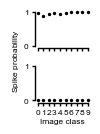

In [9]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(2, 1, figsize=(0.65, 1.15))
    ax[0].scatter(np.arange(10), tunings1, marker="o", c="k", clip_on=False, s=2.0)
    ax[1].scatter(np.arange(10), tunings2, marker="o", c="k", clip_on=False, s=2.0)
    for i in range(2):
        ax[i].set_xticks(np.arange(10))
        ax[i].set_yticks([0, 1])
        ax[i].set_ylim([0, 1])
        ax[i].set_xlim([0, 9])
        for line in ["left","bottom"]:
            ax[i].spines[line].set_position(("outward", 2.0))
    ax[0].set_xticklabels([])
    ax[1].set_ylabel(r"$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$"+"Spike probability", labelpad=2)
    ax[1].set_xlabel("Image class", labelpad=2)
    plt.subplots_adjust(hspace=0.6)
    plt.savefig("../svg/panel_g_supp.svg", bbox_inches="tight", transparent=True)
    plt.show()

### Tuning of all neurons

In [45]:
with open("../results/traces/output_trained.pkl", "rb") as handle:
    output_trained = pickle.load(handle)

with open("../results/traces/labels_trained.pkl", "rb") as handle:
    labels_trained = pickle.load(handle)

hidden_neuron_activities = output_trained[:, :64, :]

In [46]:
def compute_tuning(neuron_id):
    tunings = []
    for label in range(10):
        image_is_digit = np.asarray(labels_trained == label)
        avg_hidden_activities = np.mean(np.any(hidden_neuron_activities[image_is_digit, neuron_id] > 20.0, axis=1), axis=0)
        tunings.append(avg_hidden_activities)
    return np.asarray(tunings)

tunings = []
for i in range(64):
    tunings.append(compute_tuning(i))

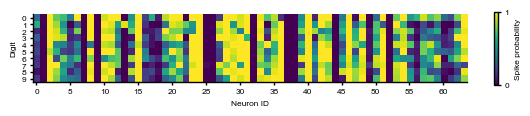

In [82]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(7.0, 0.95))
    im = ax.imshow(np.asarray(tunings).T)
    ax.set_yticks(np.arange(10))
    ax.set_xticks(np.arange(0, 64, 5))
    ax.set_ylabel("Digit")
    ax.set_xlabel("Neuron ID")
    cb = fig.colorbar(im)
    cb.set_ticks([0, 1])
    cb.set_label("Spike probability")
    plt.savefig("../svg/panel_g_supp2.svg", bbox_inches="tight", transparent=True)
    plt.show()

# Assemble figure

In [35]:
def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

svg_scale = 1.334  # set this to 1.334 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '8pt', 'font': 'Arial', 'weight': '800'}
kwargs_text_normal = {'size': '6pt', 'font': 'Arial'}

f = Figure(
    "3.0cm",
    "3.6cm",

    Panel(
        Text("Untrained hidden layer tuning", 0, 0.0, **kwargs_text_normal),
    ).move(3, 8),
    Panel(SVG("../svg/panel_g_supp.svg").scale(svg_scale).move(-2, 10)),
    Text("ID: 13", 85, 25, **kwargs_text_normal),
    Panel(SVG("../svg/panel_g2.svg").scale(svg_scale).move(74, 16)),
    Text("ID: 36", 85, 76, **kwargs_text_normal),
    Panel(SVG("../svg/panel_g3.svg").scale(svg_scale).move(77, 71)),

)

!mkdir -p fig
f.save("../fig/fig6_supp_untrained_tuning.svg")
svg("../fig/fig6_supp_untrained_tuning.svg")

In [90]:
def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

svg_scale = 1.334  # set this to 1.334 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '8pt', 'font': 'Arial', 'weight': '800'}
kwargs_text_normal = {'size': '6pt', 'font': 'Arial'}

f = Figure(
    "13.5cm",
    "2.9cm",
    Panel(
        Text("Tuning of all hidden layer neurons", 0, 0.0, **kwargs_text_normal),
    ).move(183, 8),
    Panel(SVG("../svg/panel_g_supp2.svg").scale(svg_scale).move(-2, 3)),
)

!mkdir -p fig
f.save("../fig/fig6_supp_trained_tuning_all.svg")
svg("../fig/fig6_supp_trained_tuning_all.svg")